In [1]:
#!pip install -U -q datasets transformers[torch] timm wandb torchmetrics matplotlib albumentations

TODO: remove this file from project

In [1]:
from datasets import load_dataset

dataset = load_dataset("detection-datasets/fashionpedia")

In [2]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image_id', 'image', 'width', 'height', 'objects'],
        num_rows: 45623
    })
    val: Dataset({
        features: ['image_id', 'image', 'width', 'height', 'objects'],
        num_rows: 1158
    })
})

In [4]:
dataset["train"][0]

{'image_id': 23,
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=682x1024>,
 'width': 682,
 'height': 1024,
 'objects': {'bbox_id': [150311, 150312, 150313, 150314],
  'category': [23, 23, 33, 10],
  'bbox': [[445.0, 910.0, 505.0, 983.0],
   [239.0, 940.0, 284.0, 994.0],
   [298.0, 282.0, 386.0, 352.0],
   [210.0, 282.0, 448.0, 665.0]],
  'area': [1422, 843, 373, 56375]}}

In [5]:
train_dataset = dataset["train"]
test_dataset = dataset["val"]

In [6]:
"""
def create_sample(dataset, sample_fraction=0.01, seed=42):
    sample_size = int(sample_fraction * len(dataset))
    sampled_dataset = dataset.shuffle(seed=seed).select(range(sample_size))
    print(f"Original size: {len(dataset)}")
    print(f"Sample size: {len(sampled_dataset)}")
    return sampled_dataset

# Apply function to both splits
train_dataset = create_sample(train_dataset)
test_dataset = create_sample(test_dataset)
"""

'\ndef create_sample(dataset, sample_fraction=0.01, seed=42):\n    sample_size = int(sample_fraction * len(dataset))\n    sampled_dataset = dataset.shuffle(seed=seed).select(range(sample_size))\n    print(f"Original size: {len(dataset)}")\n    print(f"Sample size: {len(sampled_dataset)}")\n    return sampled_dataset\n\n# Apply function to both splits\ntrain_dataset = create_sample(train_dataset)\ntest_dataset = create_sample(test_dataset)\n'

In [7]:
import numpy as np
from PIL import Image, ImageDraw


id2label = {
    0: "shirt, blouse",
    1: "top, t-shirt, sweatshirt",
    2: "sweater",
    3: "cardigan",
    4: "jacket",
    5: "vest",
    6: "pants",
    7: "shorts",
    8: "skirt",
    9: "coat",
    10: "dress",
    11: "jumpsuit",
    12: "cape",
    13: "glasses",
    14: "hat",
    15: "headband, head covering, hair accessory",
    16: "tie",
    17: "glove",
    18: "watch",
    19: "belt",
    20: "leg warmer",
    21: "tights, stockings",
    22: "sock",
    23: "shoe",
    24: "bag, wallet",
    25: "scarf",
    26: "umbrella",
    27: "hood",
    28: "collar",
    29: "lapel",
    30: "epaulette",
    31: "sleeve",
    32: "pocket",
    33: "neckline",
    34: "buckle",
    35: "zipper",
    36: "applique",
    37: "bead",
    38: "bow",
    39: "flower",
    40: "fringe",
    41: "ribbon",
    42: "rivet",
    43: "ruffle",
    44: "sequin",
    45: "tassel",
}


label2id = {v: k for k, v in id2label.items()}

{'bbox_id': [158977, 158978, 158979, 158980, 158981, 158982, 158983], 'category': [1, 23, 23, 6, 31, 31, 33], 'bbox': [[210.0, 225.0, 536.0, 784.0], [290.0, 897.0, 350.0, 1015.0], [464.0, 950.0, 534.0, 1021.0], [313.0, 407.0, 524.0, 954.0], [268.0, 229.0, 333.0, 563.0], [489.0, 247.0, 528.0, 591.0], [387.0, 225.0, 450.0, 253.0]], 'area': [69960, 2449, 1788, 75418, 15149, 5998, 479]}


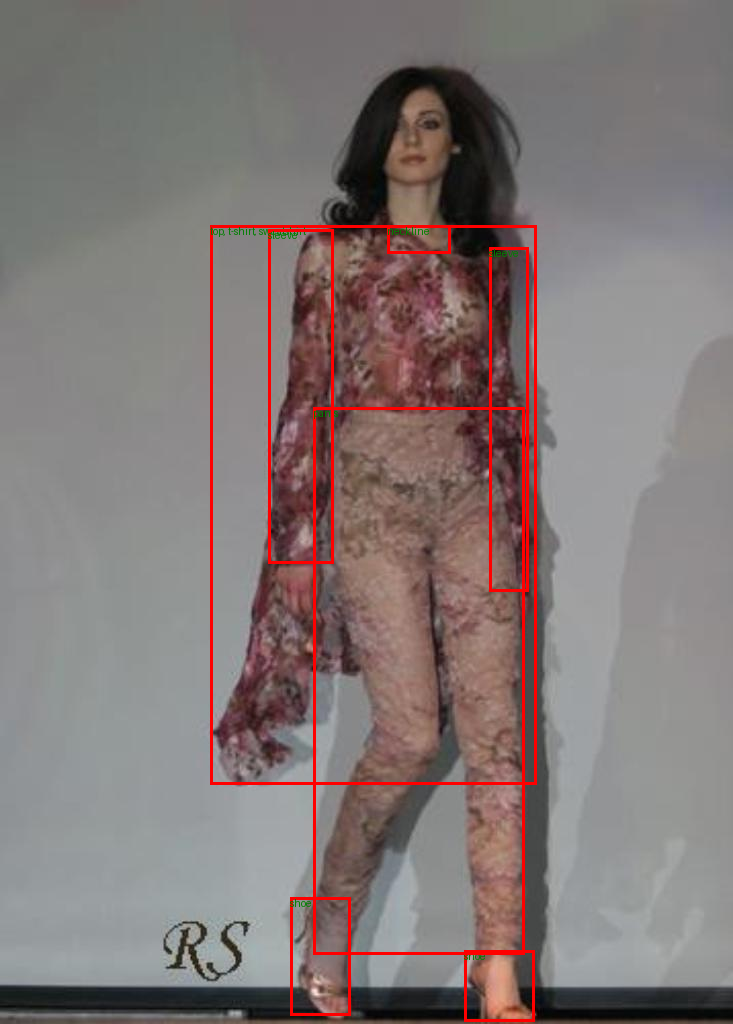

In [8]:
def draw_image_from_idx(dataset, idx):
    sample = dataset[idx]
    image = sample["image"]
    annotations = sample["objects"]
    draw = ImageDraw.Draw(image)
    width, height = sample["width"], sample["height"]

    print(annotations)

    for i in range(len(annotations["bbox_id"])):
        box = annotations["bbox"][i]
        x1, y1, x2, y2 = tuple(box)
        draw.rectangle((x1, y1, x2, y2), outline="red", width=3)
        draw.text((x1, y1), id2label[annotations["category"][i]], fill="green")

    return image


draw_image_from_idx(dataset=train_dataset, idx=10)  # You can test changing this id

{'bbox_id': [150311, 150312, 150313, 150314], 'category': [23, 23, 33, 10], 'bbox': [[445.0, 910.0, 505.0, 983.0], [239.0, 940.0, 284.0, 994.0], [298.0, 282.0, 386.0, 352.0], [210.0, 282.0, 448.0, 665.0]], 'area': [1422, 843, 373, 56375]}
{'bbox_id': [158953, 158954, 158955, 158956, 158957, 158958, 158959, 158960, 158961, 158962], 'category': [2, 33, 31, 31, 13, 7, 22, 22, 23, 23], 'bbox': [[182.0, 220.0, 472.0, 647.0], [294.0, 221.0, 407.0, 257.0], [405.0, 297.0, 472.0, 647.0], [182.0, 264.0, 266.0, 621.0], [284.0, 135.0, 372.0, 169.0], [238.0, 537.0, 414.0, 606.0], [351.0, 732.0, 417.0, 922.0], [202.0, 749.0, 270.0, 930.0], [200.0, 921.0, 256.0, 979.0], [373.0, 903.0, 455.0, 966.0]], 'area': [87267, 1220, 16895, 18541, 1468, 9360, 8629, 8270, 2717, 3121]}
{'bbox_id': [169196, 169197, 169198, 169199, 169200, 169201, 169202, 169203, 169204, 169205, 169206, 169207, 169208, 169209, 169210], 'category': [13, 29, 28, 32, 32, 31, 31, 0, 31, 31, 18, 4, 6, 23, 23], 'bbox': [[441.0, 132.0, 499

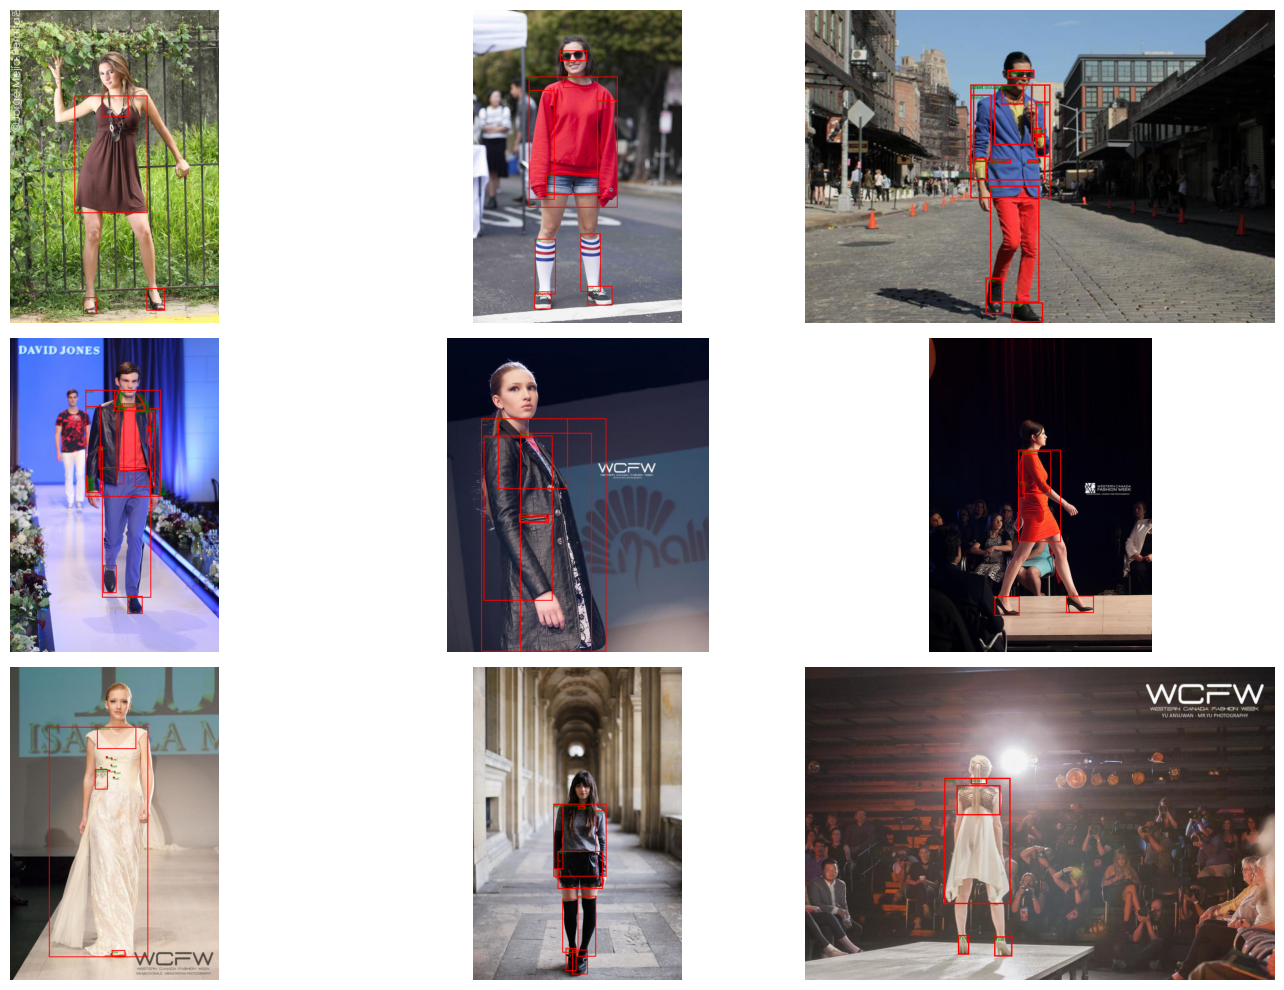

In [9]:
import matplotlib.pyplot as plt


def plot_images(dataset, indices):
    """
    Plot images and their annotations.
    """
    num_cols = 3
    num_rows = int(np.ceil(len(indices) / num_cols))
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

    for i, idx in enumerate(indices):
        row = i // num_cols
        col = i % num_cols

        image = draw_image_from_idx(dataset, idx)

        axes[row, col].imshow(image)
        axes[row, col].axis("off")

    for j in range(i + 1, num_rows * num_cols):
        fig.delaxes(axes.flatten()[j])

    plt.tight_layout()
    plt.show()


plot_images(train_dataset, range(9))

In [10]:
from datasets import Dataset


def filter_invalid_bboxes(example):
    valid_bboxes = []
    valid_bbox_ids = []
    valid_categories = []
    valid_areas = []

    for i, bbox in enumerate(example["objects"]["bbox"]):
        x_min, y_min, x_max, y_max = bbox[:4]
        if x_min < x_max and y_min < y_max:
            valid_bboxes.append(bbox)
            valid_bbox_ids.append(example["objects"]["bbox_id"][i])
            valid_categories.append(example["objects"]["category"][i])
            valid_areas.append(example["objects"]["area"][i])
        else:
            print(
                f"Image with invalid bbox: {example['image_id']} Invalid bbox detected and discarded: {bbox} - bbox_id: {example['objects']['bbox_id'][i]} - category: {example['objects']['category'][i]}"
            )

    example["objects"]["bbox"] = valid_bboxes
    example["objects"]["bbox_id"] = valid_bbox_ids
    example["objects"]["category"] = valid_categories
    example["objects"]["area"] = valid_areas

    return example


train_dataset = train_dataset.map(filter_invalid_bboxes)
test_dataset = test_dataset.map(filter_invalid_bboxes)

In [11]:
print(train_dataset)
print(test_dataset)

Dataset({
    features: ['image_id', 'image', 'width', 'height', 'objects'],
    num_rows: 45623
})
Dataset({
    features: ['image_id', 'image', 'width', 'height', 'objects'],
    num_rows: 1158
})


In [ ]:
id_list = []
category_examples = {}
for example in train_dataset:
    id_list += example["objects"]["bbox_id"]
    for category in example["objects"]["category"]:
        if id2label[category] not in category_examples:
            category_examples[id2label[category]] = 1
        else:
            category_examples[id2label[category]] += 1

id_list.sort()

In [ ]:
import matplotlib.pyplot as plt

categories = list(category_examples.keys())
values = list(category_examples.values())

fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.bar(categories, values, color="skyblue")

ax.set_xlabel("Categories", fontsize=14)
ax.set_ylabel("Number of Occurrences", fontsize=14)
ax.set_title("Number of Occurrences by Category", fontsize=16)

ax.set_xticklabels(categories, rotation=90, ha="right")
ax.grid(axis="y", linestyle="--", alpha=0.7)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f"{height}", ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
import albumentations as A

train_transform = A.Compose(
    [
        A.LongestMaxSize(500),
        A.PadIfNeeded(500, 500, border_mode=0, value=(0, 0, 0)),
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.5),
        A.HueSaturationValue(p=0.5),
        A.Rotate(limit=10, p=0.5),
        A.RandomScale(scale_limit=0.2, p=0.5),
        A.GaussianBlur(p=0.5),
        A.GaussNoise(p=0.5),
    ],
    bbox_params=A.BboxParams(format="pascal_voc", label_fields=["category"]),
)

val_transform = A.Compose(
    [
        A.LongestMaxSize(500),
        A.PadIfNeeded(500, 500, border_mode=0, value=(0, 0, 0)),
    ],
    bbox_params=A.BboxParams(format="pascal_voc", label_fields=["category"]),
)

In [ ]:
from transformers import AutoImageProcessor

checkpoint = "facebook/detr-resnet-50-dc5"
image_processor = AutoImageProcessor.from_pretrained(checkpoint)

In [ ]:
def formatted_anns(image_id, category, area, bbox):
    annotations = []
    for i in range(0, len(category)):
        new_ann = {
            "image_id": image_id,
            "category_id": category[i],
            "isCrowd": 0,
            "area": area[i],
            "bbox": list(bbox[i]),
        }
        annotations.append(new_ann)

    return annotations


def convert_voc_to_coco(bbox):
    xmin, ymin, xmax, ymax = bbox
    width = xmax - xmin
    height = ymax - ymin
    return [xmin, ymin, width, height]


def transform_aug_ann(examples, transform):
    image_ids = examples["image_id"]
    images, bboxes, area, categories = [], [], [], []
    for image, objects in zip(examples["image"], examples["objects"]):
        image = np.array(image.convert("RGB"))[:, :, ::-1]
        out = transform(image=image, bboxes=objects["bbox"], category=objects["category"])

        area.append(objects["area"])
        images.append(out["image"])

        # Convert to COCO format
        converted_bboxes = [convert_voc_to_coco(bbox) for bbox in out["bboxes"]]
        bboxes.append(converted_bboxes)

        categories.append(out["category"])

    targets = [
        {"image_id": id_, "annotations": formatted_anns(id_, cat_, ar_, box_)}
        for id_, cat_, ar_, box_ in zip(image_ids, categories, area, bboxes)
    ]

    return image_processor(images=images, annotations=targets, return_tensors="pt")


def transform_train(examples):
    return transform_aug_ann(examples, transform=train_transform)


def transform_val(examples):
    return transform_aug_ann(examples, transform=val_transform)


train_dataset_transformed = train_dataset.with_transform(transform_train)
test_dataset_transformed = test_dataset.with_transform(transform_val)

In [ ]:
# Updated draw function to accept an optional transform
def draw_augmented_image_from_idx(dataset, idx, transform=None):
    sample = dataset[idx]
    image = sample["image"]
    annotations = sample["objects"]

    # Convert image to RGB and NumPy array
    image = np.array(image.convert("RGB"))[:, :, ::-1]

    if transform:
        augmented = transform(image=image, bboxes=annotations["bbox"], category=annotations["category"])
        image = augmented["image"]
        annotations["bbox"] = augmented["bboxes"]
        annotations["category"] = augmented["category"]

    image = Image.fromarray(image[:, :, ::-1])  # Convert back to PIL Image
    draw = ImageDraw.Draw(image)
    width, height = sample["width"], sample["height"]

    for i in range(len(annotations["bbox_id"])):
        box = annotations["bbox"][i]
        x1, y1, x2, y2 = tuple(box)

        # Normalize coordinates if necessary
        if max(box) <= 1.0:
            x1, y1 = int(x1 * width), int(y1 * height)
            x2, y2 = int(x2 * width), int(y2 * height)
        else:
            x1, y1 = int(x1), int(y1)
            x2, y2 = int(x2), int(y2)

        draw.rectangle((x1, y1, x2, y2), outline="red", width=3)
        draw.text((x1, y1), id2label[annotations["category"][i]], fill="green")

    return image


# Updated plot function to include augmentation
def plot_augmented_images(dataset, indices, transform=None):
    """
    Plot images and their annotations with optional augmentation.
    """
    num_rows = len(indices) // 3
    num_cols = 3
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

    for i, idx in enumerate(indices):
        row = i // num_cols
        col = i % num_cols

        # Draw augmented image
        image = draw_augmented_image_from_idx(dataset, idx, transform=transform)

        # Display image on the corresponding subplot
        axes[row, col].imshow(image)
        axes[row, col].axis("off")

    plt.tight_layout()
    plt.show()


# Now use the function to plot augmented images
plot_augmented_images(train_dataset, range(9), transform=train_transform)

In [ ]:
from transformers import AutoModelForObjectDetection

model = AutoModelForObjectDetection.from_pretrained(
    checkpoint,
    id2label=id2label,
    label2id=label2id,
    ignore_mismatched_sizes=True,
)

In [ ]:
output_dir = "detr-resnet-50-dc5-fashionpedia-finetuned"  # change this

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from transformers import TrainingArguments
from transformers import Trainer

import torch

# Define the training arguments

training_args = TrainingArguments(
    output_dir=output_dir,
    per_device_train_batch_size=2,  #4,
    per_device_eval_batch_size=2,  #4,
    max_steps=10000,
    fp16=True,
    save_steps=10,
    logging_steps=1,
    learning_rate=1e-5,
    weight_decay=1e-4,
    save_total_limit=2,
    remove_unused_columns=False,
    #evaluation_strategy="steps",
    eval_steps=50,
    eval_strategy="steps",
    report_to="wandb",
    push_to_hub=True,
    batch_eval_metrics=True,
)

In [ ]:
import wandb

wandb.init(
    project="detr-resnet-50-dc5-fashionpedia-finetuned",  # change this
    name="detr-resnet-50-dc5-fashionpedia-finetuned",  # change this
    config=training_args,
)

In [ ]:
from torchmetrics.detection.mean_ap import MeanAveragePrecision
from torch.nn.functional import softmax


def denormalize_boxes(boxes, width, height):
    boxes = boxes.clone()
    boxes[:, 0] *= width  # xmin
    boxes[:, 1] *= height  # ymin
    boxes[:, 2] *= width  # xmax
    boxes[:, 3] *= height  # ymax
    return boxes


batch_metrics = []


def compute_metrics(eval_pred, compute_result):
    global batch_metrics

    (loss_dict, scores, pred_boxes, last_hidden_state, encoder_last_hidden_state), labels = eval_pred

    image_sizes = []
    target = []
    for label in labels:

        image_sizes.append(label["orig_size"])
        width, height = label["orig_size"]
        denormalized_boxes = denormalize_boxes(label["boxes"], width, height)
        target.append(
            {
                "boxes": denormalized_boxes,
                "labels": label["class_labels"],
            }
        )
    predictions = []
    for score, box, target_sizes in zip(scores, pred_boxes, image_sizes):
        # Extract the bounding boxes, labels, and scores from the model's output
        pred_scores = score[:, :-1]  # Exclude the no-object class
        pred_scores = softmax(pred_scores, dim=-1)
        width, height = target_sizes
        pred_boxes = denormalize_boxes(box, width, height)
        pred_labels = torch.argmax(pred_scores, dim=-1)

        # Get the scores corresponding to the predicted labels
        pred_scores_for_labels = torch.gather(pred_scores, 1, pred_labels.unsqueeze(-1)).squeeze(-1)
        predictions.append(
            {
                "boxes": pred_boxes,
                "scores": pred_scores_for_labels,
                "labels": pred_labels,
            }
        )

    metric = MeanAveragePrecision(box_format="xywh", class_metrics=True)

    if not compute_result:
        # Accumulate batch-level metrics
        batch_metrics.append({"preds": predictions, "target": target})
        return {}
    else:
        # Compute final aggregated metrics
        # Aggregate batch-level metrics (this should be done based on your metric library's needs)
        all_preds = []
        all_targets = []
        for batch in batch_metrics:
            all_preds.extend(batch["preds"])
            all_targets.extend(batch["target"])

        # Update metric with all accumulated predictions and targets
        metric.update(preds=all_preds, target=all_targets)
        metrics = metric.compute()

        # Convert and format metrics as needed
        classes = metrics.pop("classes")
        map_per_class = metrics.pop("map_per_class")
        mar_100_per_class = metrics.pop("mar_100_per_class")

        for class_id, class_map, class_mar in zip(classes, map_per_class, mar_100_per_class):
            class_name = id2label[class_id.item()] if id2label is not None else class_id.item()
            metrics[f"map_{class_name}"] = class_map
            metrics[f"mar_100_{class_name}"] = class_mar

        # Round metrics for cleaner output
        metrics = {k: round(v.item(), 4) for k, v in metrics.items()}

        # Clear batch metrics for next evaluation
        batch_metrics = []

        return metrics

In [ ]:
def collate_fn(batch):
    pixel_values = [item["pixel_values"] for item in batch]
    encoding = image_processor.pad(pixel_values, return_tensors="pt")
    labels = [item["labels"] for item in batch]

    batch = {}
    batch["pixel_values"] = encoding["pixel_values"]
    batch["pixel_mask"] = encoding["pixel_mask"]
    batch["labels"] = labels

    return batch

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    train_dataset=train_dataset_transformed,
    eval_dataset=test_dataset_transformed,
    tokenizer=image_processor,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

In [ ]:
# trainer.push_to_hub()

In [ ]:
import requests
from transformers import pipeline
import numpy as np
from PIL import Image, ImageDraw

url = "https://images.unsplash.com/photo-1536243298747-ea8874136d64?q=80&w=640"

image = Image.open(requests.get(url, stream=True).raw)

obj_detector = pipeline(
    "object-detection", model="sergiopaniego/detr-resnet-50-dc5-fashionpedia-finetuned"  # Change with your model name
)


results = obj_detector(image)
print(results)

In [ ]:
from PIL import Image, ImageDraw
import numpy as np


def plot_results(image, results, threshold=0.6):
    image = Image.fromarray(np.uint8(image))
    draw = ImageDraw.Draw(image)
    width, height = image.size

    for result in results:
        score = result["score"]
        label = result["label"]
        box = list(result["box"].values())

        if score > threshold:
            x1, y1, x2, y2 = tuple(box)
            draw.rectangle((x1, y1, x2, y2), outline="red", width=3)
            draw.text((x1 + 5, y1 - 10), label, fill="white")
            draw.text((x1 + 5, y1 + 10), f"{score:.2f}", fill="green" if score > 0.7 else "red")

    return image

In [ ]:
plot_results(image, results)

In [ ]:
metrics = trainer.evaluate(test_dataset_transformed)
print(metrics)